## Part 1: NYC taxi data

### Basic Questions

1. What is the distribution of number of passengers per trip? (trips)
2. What is the distribution of payment_type? (fares)
3. What is the distribution of fare amount? (fares)
4. What is the distribution of tip amount? (fares)
5. What is the distribution of total amount? (fares)
6. What are top 5 busiest hours of the day? (trips/fares)
7. What are the top 10 busiest locations of the city? (trips)
8. Which trip has the highest standard deviation of travel time? (trips)
9. Which trip has most consistent fares? (fares)

### Open Questions

1. In what trips can you confidently use respective means as measures of central tendency
to estimate fare, time taken, etc.
2. Can we build a model to predict fare and tip amount given pick up and drop off
coordinates, time of day and week?
3. If you were a taxi owner, how would you maximize your earnings in a day?
4. If you were a taxi owner, how would you minimize your work time while retaining the
average wages earned by a typical taxi in the dataset?
5. If you run a taxi company with 10 taxis, how would you maximize your earnings?

## Part 2: Open showcase
After the presentation of you results for “NYC taxi data” case, you’ll have the opportunity to present your
own work for 15 minutes.
Please illustrate with an achievement of your choice (e.g. publication, participation in the community,
portfolio, open repository, etc).

### Available Data

**Note**: many columns begit with a white space!
The **trip**-related data points are the following:

* 'medallion',
* ' hack_license',
* ' vendor_id',
* ' rate_code',
* ' store_and_fwd_flag',
* ' pickup_datetime',
* ' dropoff_datetime',
* ' passenger_count',
* ' trip_time_in_secs',
* ' trip_distance',
* ' pickup_longitude',
* ' pickup_latitude',
* ' dropoff_longitude',
* ' dropoff_latitude'

and the **fare** CSV file contains the columns as below

* 'medallion',
* ' hack_license',
* ' vendor_id',
* ' pickup_datetime',
* ' payment_type',
* ' fare_amount',
* ' surcharge',
* ' mta_tax',
* ' tip_amount',
* ' tolls_amount',
* ' total_amount'

In [11]:
import pandas as pd
import re
import seaborn as sns
import arrow
import time
from collections import Counter, defaultdict
import geopandas as gpd
import numpy as np
from geopy.geocoders import Nominatim

sns.set_style("whitegrid")

nom = Nominatim(user_agent='app', timeout=10)

In [12]:
class Taxi:
    
    def __init__(self, trip_file, fare_file):
        
        self.trip_file = trip_file
        self.fare_file = fare_file
        
        self.extreme_trip_index = None
        self.popular_locations = None
        self.AV_TRIP_TIME = None
        self.STD_TRIP_TIME = None
        
        self.distros = defaultdict(lambda: defaultdict(int))

    def get_trip_stats(self, rows_at_once=50000):
        
        """
        calculates 
        
            - the number of passengers per trip
            - top 5 busiest hours of the day
            - top 10 busiest locations
            - trip with the highest std of travel time
            
        these can be used to answer questions 
        
        1. What is the distribution of number of passengers per trip? (trips)
        6. What are top 5 busiest hours of the day? (trips/fares)
        7. What are the top 10 busiest locations of the city? (trips)
        8. Which trip has the highest standard deviation of travel time? (trips)
        """
        
        # trip is defined by (medallion, pickup_datetime)
        
        travel_times_sec = list()
        
        for i, d in enumerate(pd.read_csv('data/' + self.trip_file, chunksize=rows_at_once, 
                                          usecols=['medallion', ' pickup_datetime', ' passenger_count', ' pickup_longitude',
 ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude', ' trip_time_in_secs'])):
            for row in d.groupby(['medallion', ' pickup_datetime']).sum().iterrows():
                self.distros['passengers'][row[0]] += row[1][' passenger_count']
                self.distros['pickup_hrs'][arrow.get(row[0][1]).hour] += 1
                
                self.distros['loc'][(round(row[1][' pickup_latitude'],3), round(row[1][' pickup_longitude'],3))] += 1
                self.distros['loc'][(round(row[1][' dropoff_latitude'],3), round(row[1][' dropoff_longitude'],3))] += 1
                
                travel_times_sec.append(row[1][' trip_time_in_secs'])
                
            if i%10 == 0:
                print(f'done {i*rows_at_once:,} rows..')
                
        self.STD_TRIP_TIME = np.std(travel_times_sec)
        self.AV_TRIP_TIME = np.mean(travel_times_sec)
        
        self.extreme_trip_index = travel_times_sec.index(max(travel_times_sec, key=lambda x: abs(x - self.AV_TRIP_TIME)))
        
        self.popular_locations = sorted([(','.join([str(k[0]), str(k[1])]), v) 
                                   for k, v in self.distros['loc'].items()], key=lambda x: x[1], reverse=True)
        
                
        return self
    
    def get_fare_stats(self, rows_at_once=50000):
        
        """
        2. What is the distribution of payment_type? (fares)
        3. What is the distribution of fare amount? (fares)
        4. What is the distribution of tip amount? (fares)
        5. What is the distribution of total amount? (fares)
        9. Which trip has most consistent fares? (fares)
        """
        
        fares = defaultdict(lambda: defaultdict())
        
        

In [14]:
if __name__ == '__main__':
    
    t0 = time.time()
    tx = Taxi(trip_file='trip_data_4.csv', fare_file='trip_fare_4.csv').get_trip_stats(rows_at_once=100000)
    t1 = time.time()
    m, s = divmod(t1-t0, 60)
    print(f'elapsed time: {m:.0f} m {s:.0f} s')

done 0 rows..
done 400,000 rows..
done 800,000 rows..
done 1,200,000 rows..
done 1,600,000 rows..
done 2,000,000 rows..
done 2,400,000 rows..
done 2,800,000 rows..
done 3,200,000 rows..
done 3,600,000 rows..
done 4,000,000 rows..
done 4,400,000 rows..
done 4,800,000 rows..
done 5,200,000 rows..
done 5,600,000 rows..
done 6,000,000 rows..
done 6,400,000 rows..
done 6,800,000 rows..
done 7,200,000 rows..
done 7,600,000 rows..
done 8,000,000 rows..
done 8,400,000 rows..
done 8,800,000 rows..
done 9,200,000 rows..
done 9,600,000 rows..
done 10,000,000 rows..
done 10,400,000 rows..
done 10,800,000 rows..
done 11,200,000 rows..
done 11,600,000 rows..
done 12,000,000 rows..
done 12,400,000 rows..
done 12,800,000 rows..
done 13,200,000 rows..
done 13,600,000 rows..
done 14,000,000 rows..
done 14,400,000 rows..
done 14,800,000 rows..
elapsed time: 69 m 50 s


In [55]:
tx.STD_TRIP_TIME

550.4376844420722

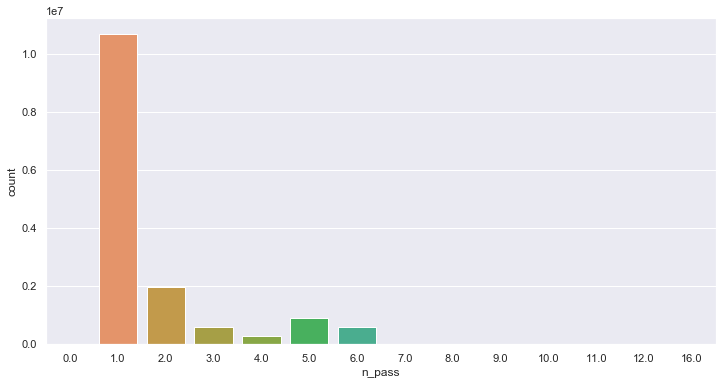

In [30]:
sns.set(rc={'figure.figsize':(12,6)})

sns.barplot(data=pd.DataFrame.from_dict(Counter(tx.distros['passengers'].values()), orient='index') \
            .reset_index()
            .rename(columns={'index': 'n_pass', 0: 'count'}), x='n_pass', y='count')

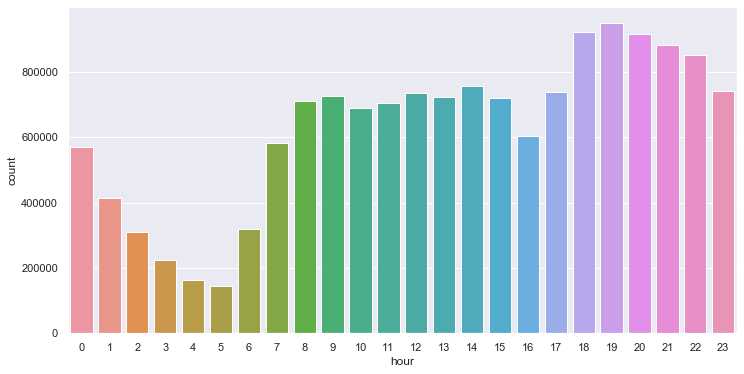

In [31]:
sns.barplot(data=pd.DataFrame.from_dict(tx.distros['pickup_hrs'], orient='index') \
            .reset_index() \
            .rename(columns={'index': 'hour', 0: 'count'}), x='hour', y='count')

In [5]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))

In [6]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


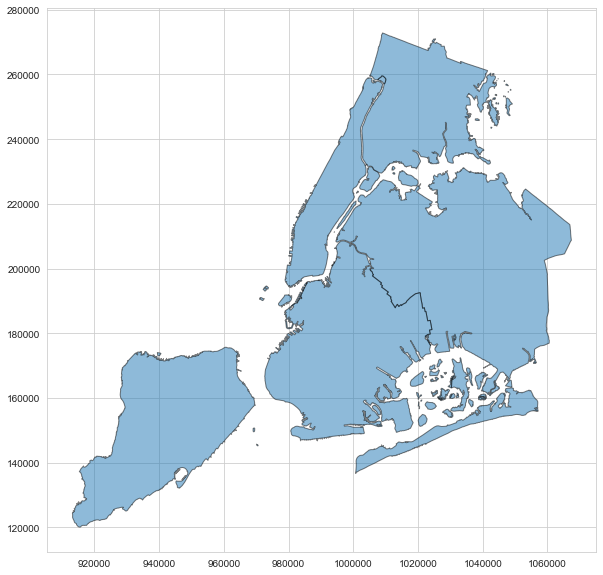

In [7]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [8]:
df = df.to_crs(epsg=3857)

In [12]:
d = pd.read_csv('data/trip_data_4.csv', nrows=3)